In [27]:
# global var set
import transformers

# model info, change as needed
batch_size = 16
num_epochs = 16

model_checkpoint = "bert-base-uncased"
# fileTag = "original-plutchik-noCombin-v1"   # original - no Combine    - pure raw
# fileTag = "original-plutchik-v1"             # original - w/ Combine
# fileTag = "clean-noCombin-v1"                # clean    - no Combine
# fileTag = "clean-v1"                         # clean    - w/ Combine    - pure clean

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [28]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [29]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['emotion'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//2 else 1 for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'], 
                                  'plutchik' : testDatasetOriginal['emotion'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//2 else 1 for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [30]:
trainDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,['helpful'],['helpful'],She is playing very hard trying to win the game.,Her grandson went and picked up noodles from t...,1
1,['saddened'],['saddened'],He was denied his parole for three straight Ye...,She took pictures of her meal.,0
2,['sad'],['sad'],John bought it and tried it out.,Paul dropped his plate.,1
3,['excited'],['excited'],"That night, Ralph saw her at a bar and they hi...",Matt climbed to the top of a small mountain wi...,0
4,['happy'],['happy'],Sarah was happy that she was able to get a new...,I chose a purple galaxy phone case.,0
...,...,...,...,...,...
42949,['normal'],['normal'],My neighbor Steve went out for a walk today.,It's nice and fluffy but has one flaw.,0
42950,"['special', 'loved', 'nice']","['special', 'loved', 'nice']",I started seeing someone a while ago.,Henry went to dinner at his friend's house one...,0
42951,['grateful'],['grateful'],He laughed at her and asked when dinner would ...,I thanked him and put it in my wallet.,1
42952,[],[],He put a potato in the oven.,Unfortunately he wasn't wearing eye protection.,1


In [31]:
testDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,['happy'],['happy'],Soon the raccoon was coming over every day for...,She stopped to play with the puppy.,0
1,['disappointed'],['disappointed'],Then he decided he was very proud to have a li...,Lisa then had to switch the location.,1
2,['disgusted'],['disgusted'],Susie could not believe it.,Tim and Ben were playing ping pong.,0
3,['sad'],['sad'],He told them that he was lost.,"Now, he lives debt free.",0
4,['surprised'],['surprised'],She said that my cousin was faking the results.,"It was a hidden camera character test, and Joh...",1
...,...,...,...,...,...
43190,['disgruntled'],['disgruntled'],Jack wanted to drive his father's car.,Red hates his boss.,1
43191,['irritated'],['irritated'],He laid the sandwich down.,Finally she was able to get the app she really...,1
43192,['helpful'],['helpful'],She told her that it was fine and Sasha was ab...,The bully caught up with Jed and started hitti...,0
43193,['nervous'],['nervous'],It was in mint condition and at a great price.,She then got in trouble at work.,1


# load dataset

In [2]:
from datasets import load_dataset, load_metric

In [3]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/multiSelect-{fileTag}-train.csv', 
                                           'test': f'./dataset/multiSelect-{fileTag}-test.csv'})

Using custom data configuration default-14bceb07d21a026c


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-14bceb07d21a026c\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 53234
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 51891
    })
})

In [5]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['overjoyed']",
 'plutchik': "{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': 2, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 0}",
 'selection0': 'He found a vintage video game system.',
 'selection1': 'Kayla has a pair of new shoes.',
 'label': 0}

In [6]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"\nGround truth: option {['A', 'B'][example['label']]}")

In [7]:
show_one(dataset["train"][0])

Context: {'joy': 0, 'trust': 0, 'fear': 0, 'surprise': 2, 'sadness': 2, 'disgust': 0, 'anger': 0, 'anticipation': 0}
  A - The squirrel ran away.
  B - She was grateful now for her sandwich and vegetables.

Ground truth: option A


# Preprocessing Data

In [8]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [9]:
import re
selectionList = ["selection0", "selection1"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
                                                        + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
                        for eachCaseWeight, eachCaseEmotionType in 
                        zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
                           [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*2 for eventIndex in 
                           range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    # first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                    for eachEmotion in ast.literal_eval(context).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+2] for i in range(0, len(v), 2)] for k, v in tokenized_examples.items()}

In [10]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 2 [48, 53]


In [11]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(1) ]

["[CLS] the following sentences contain emotions : not joy : 0,'trust ', fear : 0,'surprise ', not sadness : 2,'disgust ', not anger : 0,'anticipation'[SEP] the squirrel ran away. [SEP]",
 "[CLS] the following sentences contain emotions : not joy : 0,'trust ', fear : 3,'surprise ', not sadness : 0,'disgust ', very anger : 2,'anticipation'[SEP] jill was so thrilled. [SEP]",
 "[CLS] the following sentences contain emotions : not joy : 0,'trust ', not fear : 0,'surprise ', not sadness : 0,'disgust ', not anger : 0,'anticipation'[SEP] jen was great at cooking biscuits. [SEP]",
 "[CLS] the following sentences contain emotions : not joy : 0,'trust ', not fear : 0,'surprise ', not sadness : 0,'disgust ', not anger : 0,'anticipation'[SEP] rob got the new position! [SEP]",
 "[CLS] the following sentences contain emotions : not joy : 0,'trust ', not fear : 0,'surprise ', not sadness : 0,'disgust ', anger : 3,'anticipation'[SEP] he ended up stealing the space quickly. [SEP]"]

In [12]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/54 [00:00<?, ?ba/s]

  0%|          | 0/52 [00:00<?, ?ba/s]

In [13]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly

In [14]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [15]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [16]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [17]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(2)]

["[CLS] the following sentences contain emotions : joy : 3,'trust ', fear : 0,'surprise ', not sadness : 0,'disgust ', very anger : 0,'anticipation'[SEP] he reached third base. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]",
 "[CLS] the following sentences contain emotions : joy : 3,'trust ', fear : 0,'surprise ', not sadness : 0,'disgust ', very anger : 0,'anticipation'[SEP] i had to build a catapult for high school. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"]

In [18]:
show_one(dataset["train"][8])

Context: {'joy': 3, 'trust': 2, 'fear': 0, 'surprise': 2, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 3}
  A - He reached third base.
  B - I had to build a catapult for high school.

Ground truth: option A


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: plutchik, Unnamed: 0, selection1, emotion, selection0. If plutchik, Unnamed: 0, selection1, emotion, selection0 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 53234
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 53248


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693800,0.693128,0.504018
2,0.614600,0.594435,0.656838
3,0.564700,0.571774,0.684685
4,0.526300,0.572104,0.695053
5,0.499500,0.586160,0.701162
6,0.472300,0.586649,0.705170
7,0.467500,0.620333,0.704207
8,0.444200,0.623844,0.704265
9,0.415700,0.655308,0.705055
10,0.394100,0.685141,0.703860


Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000
Configuration saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\config.json
Model weights saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-emotionCommonsense\checkpoint-1000\tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-emotionCommonsen

TrainOutput(global_step=53248, training_loss=0.4483006133769567, metrics={'train_runtime': 8821.4262, 'train_samples_per_second': 96.554, 'train_steps_per_second': 6.036, 'total_flos': 5.267817952412011e+16, 'train_loss': 0.4483006133769567, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

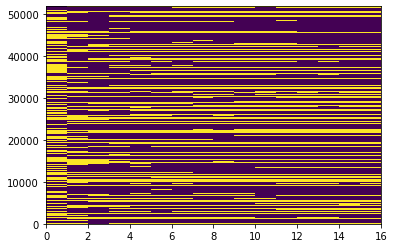

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [23]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Plutchik] 2Select/TI-{model_checkpoint}-{fileTag}.csv')

In [24]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Plutchik] 2Select/ESI-{model_checkpoint}-{fileTag}.csv')